# K-means 範例

(Optional) 若尚未安裝相關套件，執行下一行，然後 restart kernel

In [3]:
!pip3 install --user sklearn
!pip3 install --user --upgrade matplotlib

'pip3' 不是內部或外部命令、可執行的程式或批次檔。
'pip3' 不是內部或外部命令、可執行的程式或批次檔。


載入套件

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

載入 toy example 資料集

------

## sklearn.datasets.make_blobs

```
sklearn.datasets.make_blobs(n_samples=100, n_features=2, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)[source]
```

Generate isotropic Gaussian blobs for clustering.

### Parameters:	
#### n_samples : int or array-like, optional (default=100)
If int, it is the total number of points equally divided among clusters. If array-like, each element of the sequence indicates the number of samples per cluster.

#### n_features : int, optional (default=2)
The number of features for each sample.

#### centers : int or array of shape [n_centers, n_features], optional
(default=None) The number of centers to generate, or the fixed center locations. If n_samples is an int and centers is None, 3 centers are generated. If n_samples is array-like, centers must be either None or an array of length equal to the length of n_samples.

#### cluster_std : float or sequence of floats, optional (default=1.0)
The standard deviation of the clusters.

#### center_box : pair of floats (min, max), optional (default=(-10.0, 10.0))
The bounding box for each cluster center when centers are generated at random.

#### shuffle : boolean, optional (default=True)
Shuffle the samples.

#### random_state : int, RandomState instance or None (default)
Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls. See Glossary.


### Returns:
#### X : array of shape [n_samples, n_features]
The generated samples.

#### y : array of shape [n_samples]
The integer labels for cluster membership of each sample.


------

In [67]:
toy = datasets.make_blobs(centers=3, n_features=4)
X = toy[0]
y = toy[1]

In [68]:
print (f'{X.shape}, {y.shape}')

(100, 4), (100,)


In [69]:
toy

(array([[-8.75298225e+00, -2.06791346e+00, -7.89110591e+00,
         -7.78678095e+00],
        [ 9.15733727e+00,  4.04782213e+00,  3.49918780e+00,
          1.05183586e+00],
        [-7.82075953e+00, -1.04632721e+00, -8.12758877e+00,
         -9.24919937e+00],
        [-7.44270514e+00, -3.03397130e+00, -1.05495878e+01,
         -8.01209411e+00],
        [-7.96913904e+00, -3.14808808e+00, -1.00558697e+01,
         -9.17409632e+00],
        [ 9.63139738e+00,  4.91489990e+00,  2.04672970e+00,
          2.30814295e+00],
        [ 7.28337437e+00, -2.44821223e+00, -8.69206959e+00,
          8.72468060e+00],
        [-6.60978354e+00, -3.81760464e+00, -8.61738709e+00,
         -8.68327632e+00],
        [-6.63206229e+00, -2.59353072e+00, -9.77217194e+00,
         -8.19668651e+00],
        [ 7.45895338e+00, -1.40172721e+00, -1.06065143e+01,
          1.01020286e+01],
        [ 9.19411504e+00,  4.59599369e+00,  6.56385799e-01,
          6.65064426e-01],
        [ 7.93417492e+00, -9.03496842e-02, 

設定 模型 估計參數

------

## sklearn.cluster.KMeans

```
class sklearn.cluster.KMeans(n_clusters=8, init=’k-means++’, n_init=10, max_iter=300, tol=0.0001, precompute_distances=’auto’, verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm=’auto’)
```



------

In [70]:
estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

資料建模 並 視覺化 結果

## Axes3D

```
class mpl_toolkits.mplot3d.axes3d.Axes3D(fig, rect=None, *args, azim=-60, elev=30, zscale=None, sharez=None, proj_type='persp', **kwargs)[source]
```

          ================   =========================================
          Keyword            Description
          ================   =========================================
          *azim*             Azimuthal viewing angle (default -60)
          *elev*             Elevation viewing angle (default 30)
          *zscale*           [%(scale)s]
          *sharez*           Other axes to share z-limits with
          *proj_type*        'persp' or 'ortho' (default 'persp')
          ================   =========================================

#### rect=[left, bottom, width, height]


labels = [7 6 7 4 4 0 2 1 1 5 0 5 1 2 0 5 7 0 2 2 2 4 3 5 2 7 2 5 4 6 4 5 1 2 0 4 2
 7 4 3 1 6 6 3 3 4 0 3 7 2 2 4 6 4 2 0 6 0 2 2 1 3 0 4 4 5 0 4 6 2 4 5 1 0
 5 6 0 2 6 7 2 5 2 4 5 6 6 1 4 6 6 2 2 2 4 0 2 1 2 0]
labels = [1 0 1 1 1 0 2 1 1 2 0 2 1 2 0 2 1 0 2 2 2 1 0 2 2 1 2 2 1 0 1 2 1 2 0 1 2
 1 1 0 1 0 0 0 0 1 0 0 1 2 2 1 0 1 2 0 0 0 2 2 1 0 0 1 1 2 0 1 0 2 1 2 1 0
 2 0 0 2 0 1 2 2 2 1 2 0 0 1 1 0 0 2 2 2 1 0 2 1 2 0]
labels = [1 2 1 1 1 2 0 1 1 0 2 0 1 0 2 0 1 2 0 0 0 1 2 0 0 1 0 0 1 2 1 0 1 0 2 1 0
 1 1 2 1 2 2 2 2 1 2 2 1 0 0 1 2 1 0 2 2 2 0 0 1 2 2 1 1 0 2 1 2 0 1 0 1 2
 0 2 2 0 2 1 0 0 0 1 0 2 2 1 1 2 2 0 0 0 1 2 0 1 0 2]


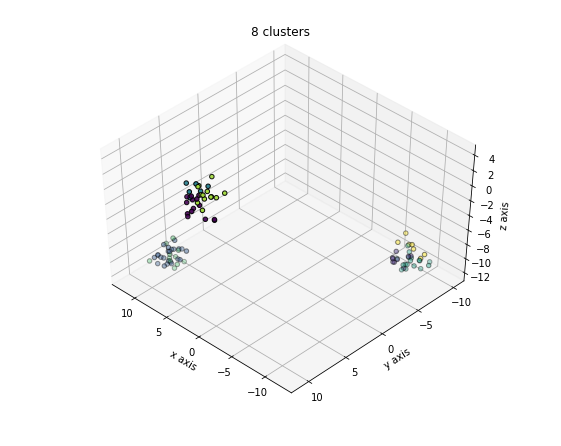

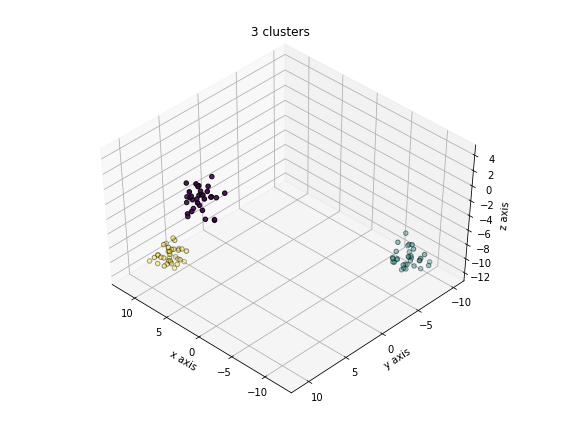

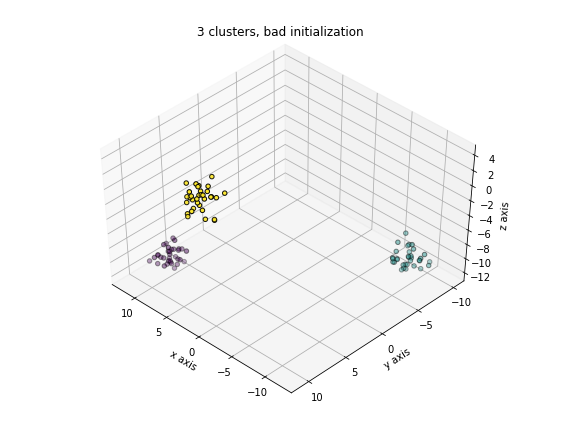

In [71]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    ## est = KMeans(....)
    est.fit(X)
    
    labels = est.labels_
    print (f'labels = {labels}')

    # scatter(xs, ys, zs=0, zdir='z', s=20, c=None, depthshade=True, *args, **kwargs)
    # Create a scatter plot
    # xs, ys : array-like. The data positions.
    #     float or array-like, optional, default: 0
    #     The z-positions. Either an array of the same length as xs and ys or a single value to place all points in the same plane.
    # c : color, sequence, or sequence of color, optional
    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    #ax.w_xaxis.set_ticklabels([])
    ax.set_xlabel('x axis')
    #ax.w_yaxis.set_ticklabels([])
    ax.set_ylabel('y axis')
    #ax.w_zaxis.set_ticklabels([])
    ax.set_zlabel('z axis')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1



In [72]:
?Axes3D

In [73]:
from matplotlib.axes import Axes
?Axes.text

y=[1 2 1 1 1 2 0 1 1 0 2 0 1 0 2 0 1 2 0 0 0 1 2 0 0 1 0 0 1 2 1 0 1 0 2 1 0
 1 1 2 1 2 2 2 2 1 2 2 1 0 0 1 2 1 0 2 2 2 0 0 1 2 2 1 1 0 2 1 2 0 1 0 1 2
 0 2 2 0 2 1 0 0 0 1 0 2 2 1 1 2 2 0 0 0 1 2 0 1 0 2]
y=[2. 0. 2. 2. 2. 0. 1. 2. 2. 1. 0. 1. 2. 1. 0. 1. 2. 0. 1. 1. 1. 2. 0. 1.
 1. 2. 1. 1. 2. 0. 2. 1. 2. 1. 0. 2. 1. 2. 2. 0. 2. 0. 0. 0. 0. 2. 0. 0.
 2. 1. 1. 2. 0. 2. 1. 0. 0. 0. 1. 1. 2. 0. 0. 2. 2. 1. 0. 2. 0. 1. 2. 1.
 2. 0. 1. 0. 0. 1. 0. 2. 1. 1. 1. 2. 1. 0. 0. 2. 2. 0. 0. 1. 1. 1. 2. 0.
 1. 2. 1. 0.]


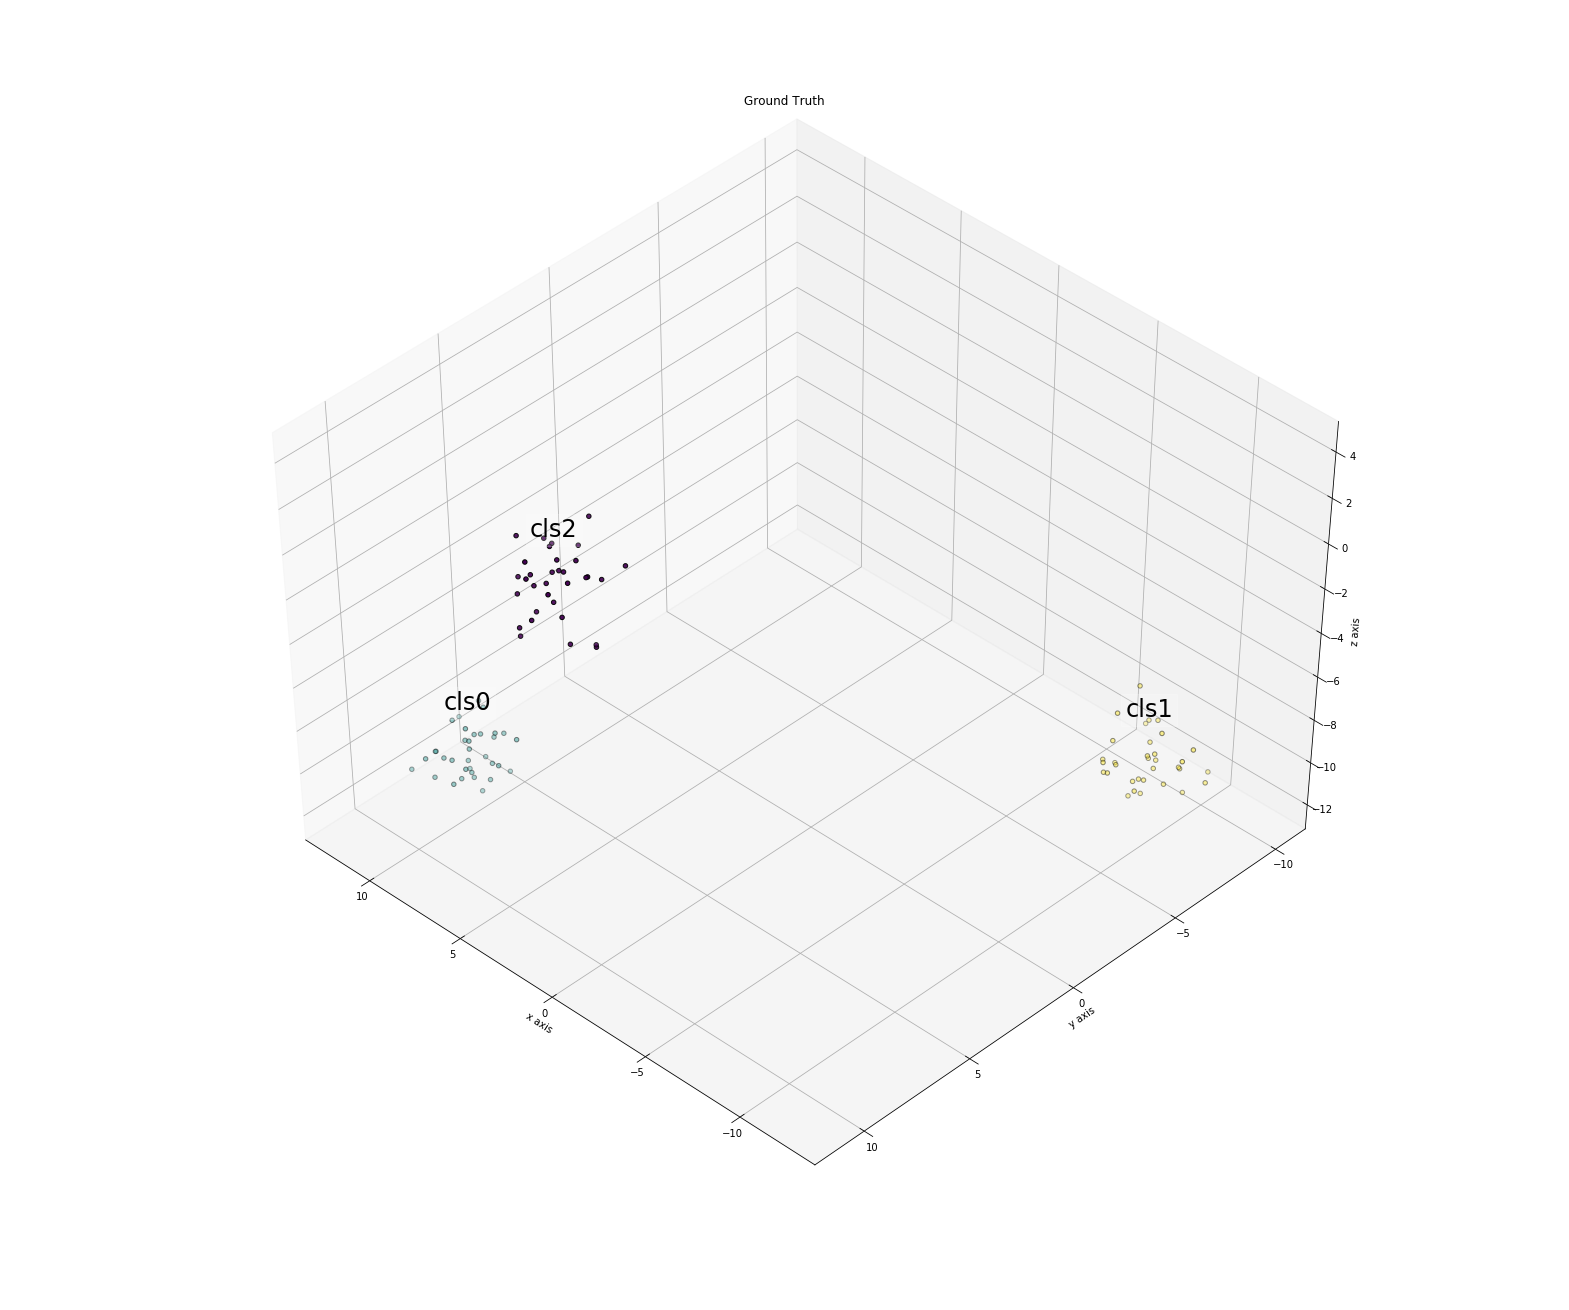

In [74]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(12, 9))
ax = Axes3D(fig, rect=[0, 0, 1.8, 2], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    
    # Draw name in X[y == label, 3].mean(), X[y == label, 0].mean(), X[y == label, 2].mean() + 2
    
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              fontsize=24, # Set font size
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

print (f'y={y}')

# Reorder the labels to have colors matching the cluster results
#     numpy.choose(a, choices, out=None, mode='raise')
#         Construct an array from an index array and a set of arrays to choose from
#     ndarray.astype: Copy of the array, cast to a specified type
#
#     Final result:  0 in array is mapped to 1, 1 => 2, 2 => 0
#
y = np.choose(y, [1, 2, 0]).astype(np.float)

print (f'y={y}')

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

#ax.w_xaxis.set_ticklabels([])
ax.set_xlabel('x axis')
#ax.w_yaxis.set_ticklabels([])
ax.set_ylabel('y axis')
#ax.w_zaxis.set_ticklabels([])
ax.set_zlabel('z axis')
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()